#                FINAL CAPSTONE PROJECT OF SYLVESTER KWAKU BONYAH

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\User'

In [161]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
#Reading the csv file
df= pd.read_csv('Datapython.csv', low_memory = False)
pd.set_option('display.max_columns',None)

In [15]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [23]:
# Display pf data types
df.dtypes

NAME                               object
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
license                            object
dtype: object

In [11]:
len(df)

102599

#                     DATA CLEANING 
### These include host id, id, country and country code from the dataset.
### State the reason for not including these columns for your Data Analytics.
### If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [13]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [19]:
df.drop(columns = ['id','host id','country','country code'],axis = 1,inplace = True)

In [20]:
df.head(2)

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [23]:
df.shape

(102058, 26)

   # Task 2b: Data Cleaning (Python)
1. Check for missing values in the dataframe and display the count in ascending order. If the values are missing, impute the values as per the datatype of the columns.
2. Check whether there are any duplicate values in the dataframe and, if present, remove them.
3. Display the total number of records in the dataframe before and after removing the duplicates.

In [24]:
#Checking for missing values
df.isnull().sum().sort_values()

room type                              0
lat                                    8
long                                   8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
reviews per month                  15879
last review                        15893
house_rules                        52131
license                           102597
dtype: int64

In [25]:
for col in df.columns:
    if df[str(col)].dtype =='object':
        print(col)
        df[str(col)].fillna(value=df[str(col)].mode()[0],inplace =True)
    else:
        df[str(col)].fillna(value=df[str(col)].median(),inplace =True)

NAME
host_identity_verified
host name
neighbourhood group
neighbourhood
instant_bookable
cancellation_policy
room type
price
service fee
last review
house_rules
license


In [28]:
df.isnull().sum().sort_values()

NAME                              0
availability 365                  0
calculated host listings count    0
review rate number                0
reviews per month                 0
last review                       0
number of reviews                 0
minimum nights                    0
service fee                       0
price                             0
Construction year                 0
room type                         0
cancellation_policy               0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood group               0
host name                         0
host_identity_verified            0
house_rules                       0
license                           0
dtype: int64

In [19]:
#Checking for duplicate values
df.shape
df.duplicated().sum()

541

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(102058, 26)

In [24]:
df.duplicated().sum()

0

# Task 3: Data Transformation (Any Tool)
1. Rename the column availability 365 to days_booked
2. Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
3. Remove the dollar sign and comma from the columns price and service_fee. If necessary, convert these two columns to the appropriate data type.
4. If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [28]:
# Replace column availability 365 with days_booked
df.rename(columns={'availability 365':'days_booked'}, inplace=True)

In [29]:
df.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,days_booked,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [30]:
#Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
df.columns = [col.lower().replace(" ","_") for col in df.columns]

In [31]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count', 'days_booked',
       'house_rules', 'license'],
      dtype='object')

In [32]:
#Remove the dollar sign and comma from the columns price and service_fee. If necessary, convert these two columns to the appropriate data type.
df[['price','service_fee']].head()

,price,service_fee
0,$966,$193
1,$142,$28
2,$620,$124
3,$368,$74
4,$204,$41


In [33]:
def remove_dollar_comma_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return value.replace ("$","").replace(",","")

In [34]:
df['price']=df['price'].apply(lambda x: remove_dollar_comma_sign(x))

In [35]:
df['service_fee']=df['service_fee'].apply(lambda x: remove_dollar_comma_sign(x))

In [37]:
df[['price','service_fee']].head()

,price,service_fee
0,966,193
1,142,28
2,620,124
3,368,74
4,204,41


In [77]:
#convert these two columns to the appropriate data type.
#df['price'] = pd.to_numeric(df['price'], errors='coerce').astype('Int64')
df['price']= pd.to_numeric(df['price'], errors = 'coerce').astype('Int64')

In [80]:
df['service_fee']=pd.to_numeric(df['service_fee'],errors = 'coerce').astype('Int64')

# Task 4: Exploratory Data Analysis (Any Tool)
1. List the count of various room types avaliable in the dataset.
2. Which room type has the most strict cancellation policy?
3. List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.
4. If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [38]:
#List the count of various room types avaliable in the dataset
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [39]:
df["room_type"].value_counts()

room_type
Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: count, dtype: int64

In [40]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [41]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: count, dtype: int64

In [42]:
df['host_identity_verified'].unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [43]:
df['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    50944
verified       50825
Name: count, dtype: int64

In [56]:
#Which room type has the most strict cancellation policy?
df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [61]:
df_group_prep = df[df['cancellation_policy']=='strict']

In [62]:
df_group_prep.shape

(33929, 26)

In [63]:
df_group_prep.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,True,strict,Private room,2005.0,1018,204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,US,False,strict,Private room,2015.0,291,58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN
12,1007964,Central Manhattan/near Broadway,88136055909,verified,NaN,Manhattan,Hell's Kitchen,40.76076,-73.98867,United States,US,False,strict,Private room,2008.0,714,143,2.0,188.0,6/23/2019,1.50,4.0,1.0,258.0,- One of the bedroom closets is not accessible...,NaN
24,1014591,CBG Helps Haiti Rm #2,57827496420,unconfirmed,Charlotte,Brooklyn,Park Slope,40.68001,-73.97865,United States,NaN,NaN,strict,Private room,2005.0,816,163,2.0,71.0,7/2/2019,0.61,4.0,6.0,344.0,We take great care of our home and expect you ...,NaN


In [72]:
df_group_prep ['room_type'].value_counts()

room_type
Entire home/apt    17730
Private room       15428
Shared room          737
Hotel room            34
Name: count, dtype: int64

In [82]:
#List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.
#grp_avg = df['price'].groupby(df['neighbourhood_group']).mean().sort_values(ascending=False).reset_index()
grp_avg = df['price'].groupby(df['neighbourhood_group']).mean().sort_values(ascending =False).reset_index()
grp_avg

,neighbourhood_group,price
0,Queens,630.217031
1,Bronx,627.764793
2,Brooklyn,626.501962
3,Staten Island,623.990486
4,Manhattan,622.650931
5,brookln,580.0
6,manhatan,460.0


In [84]:
Group_average= df['days_booked'].groupby(df['neighbourhood_group']).mean().sort_values(ascending= True).reset_index()
Group_average

,neighbourhood_group,days_booked
0,brookln,47.000000
1,Brooklyn,129.746290
2,Manhattan,141.975663
3,Queens,161.701721
4,Bronx,179.077670
5,Staten Island,197.451477
6,manhatan,325.000000


In [85]:
Group_average= df['days_booked'].groupby(df['neighbourhood_group']).mean().sort_values(ascending= False).reset_index()
Group_average

,neighbourhood_group,days_booked
0,manhatan,325.000000
1,Staten Island,197.451477
2,Bronx,179.077670
3,Queens,161.701721
4,Manhattan,141.975663
5,Brooklyn,129.746290
6,brookln,47.000000


In [88]:
#the cheapest or minimum option
grp_avg=df['price'].groupby(df['neighbourhood_group']).min().sort_values(ascending=True).reset_index()
grp_avg

,neighbourhood_group,price
0,Bronx,50
1,Brooklyn,50
2,Manhattan,50
3,Queens,50
4,Staten Island,50
5,manhatan,460
6,brookln,580


# Task 5a: Data Visualization (Any Tool)
1. Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset
2. List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
3. List the prices with respect to room type using a bar graph and also state your inferences.
4. Create a pie chart that shows distribution of booked days for each neighborhood group
If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [91]:
#Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset
grp2= df['price'].groupby(df['neighbourhood']).sum().sort_values(ascending = False)
grp2.head(10)

neighbourhood
Bedford-Stuyvesant    4912127
Williamsburg          4823625
Harlem                3405133
Bushwick              3127799
Hell's Kitchen        2450214
Upper West Side       2364256
Upper East Side       2256123
East Village          2137664
Midtown               2041027
Crown Heights         2000625
Name: price, dtype: Int64

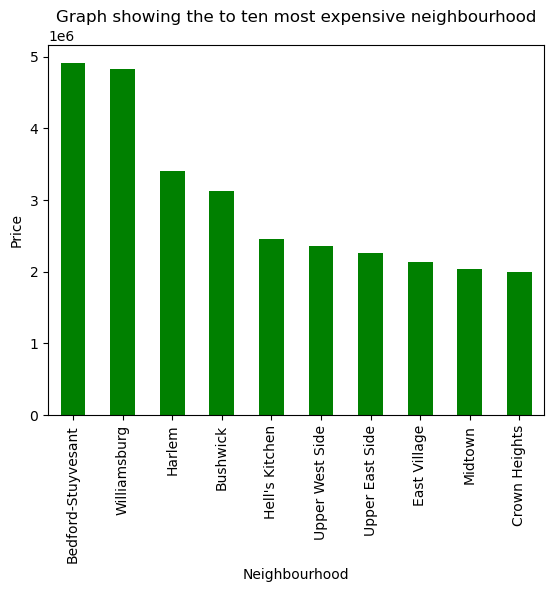

In [94]:
grp2.head(10).plot(kind='bar',color=['green'])
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Graph showing the to ten most expensive neighbourhood')
plt.show()

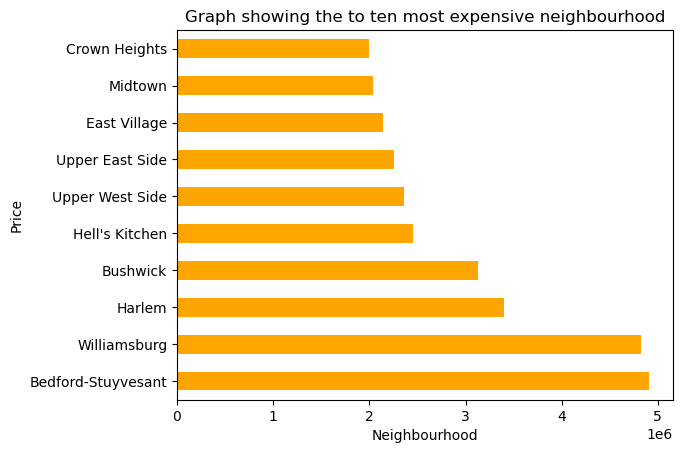

In [103]:
grp2.head(10).plot(kind='barh',color=['orange'])
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Graph showing the to ten most expensive neighbourhood')
plt.show()

<Axes: xlabel='minimum_nights', ylabel='neighbourhood_group'>

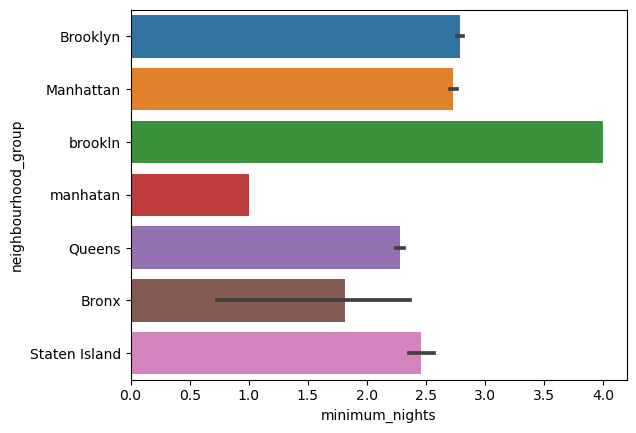

In [124]:
#List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
df_filter_min_night=df[df['minimum_nights']<=10]
df_filter_min_night['neighbourhood_group'].value_counts()

sns.barplot(x='minimum_nights',
           y='neighbourhood_group',
           data=df_filter_min_night,orient='h')

In [125]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [131]:
# List the prices with respect to room type using a bar graph and also state your inferences.
df1=df.groupby(['room_type']).agg(mean_price=('price','mean'))

In [133]:
df1 = df1.reset_index()

In [134]:
df1.head()

,room_type,mean_price
0,Entire home/apt,625.240056
1,Hotel room,666.391304
2,Private room,624.935628
3,Shared room,634.828182


<Axes: xlabel='room_type', ylabel='mean_price'>

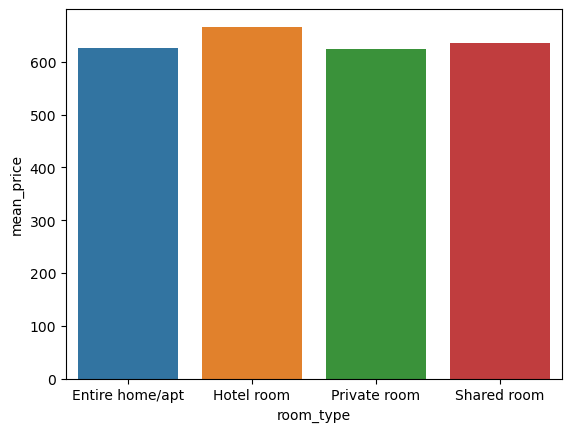

In [136]:
sns.barplot(x='room_type',
           y='mean_price',
           data=df1)

In [138]:
#Create a pie chart that shows distribution of booked days for each neighborhood group
#grp3=df['days_booked'].groupby(df['neighbourhood_group']).mean().sort_values().reset_index()
grp3=df['days_booked'].groupby(df['neighbourhood_group']).mean().sort_values().reset_index()
grp3

,neighbourhood_group,days_booked
0,brookln,47.000000
1,Brooklyn,129.746290
2,Manhattan,141.975663
3,Queens,161.701721
4,Bronx,179.077670
5,Staten Island,197.451477
6,manhatan,325.000000


([<matplotlib.patches.Wedge at 0x1f855681d90>,
 [Text(1.091427787137142, 0.1370597879208969, 'brookln'),
  Text(0.9111418395602594, 0.616295828480728, 'Brooklyn'),
  Text(0.276253838595922, 1.0647458930003058, 'Manhattan'),
  Text(-0.5780540800760183, 0.9358704400222652, 'Queens'),
  Text(-1.0931437836938847, 0.12262409294839996, 'Bronx'),
  Text(-0.6931276659745291, -0.854151063138542, 'Staten Island'),
  Text(0.7144749264799269, -0.8363764579610687, 'manhatan')],
 [Text(0.5953242475293502, 0.07475988432048922, '4%'),
  Text(0.4969864579419596, 0.3361613609894879, '11%'),
  Text(0.15068391196141198, 0.5807704870910758, '12%'),
  Text(-0.31530222549601, 0.51047478546669, '14%'),
  Text(-0.5962602456512097, 0.06688586888094543, '15%'),
  Text(-0.37806963598610677, -0.46590057989375017, '17%'),
  Text(0.38971359626177826, -0.45620534070603747, '27%')])

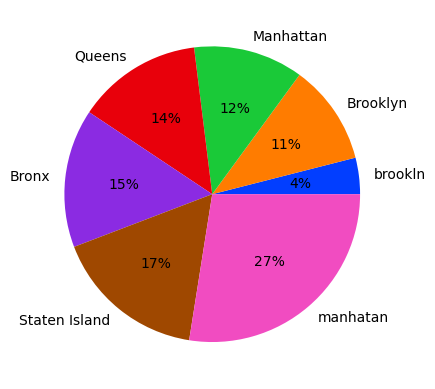

In [143]:
#palette_color = sns.color_palette('bright')

#plt.pie(grp3['days_booked'], labels=grp3['neighbourhood_group'],colors=palette_color, autopct='%.0f%%')
palette_color= sns.color_palette('bright')
plt.pie(grp3['days_booked'],labels =grp3['neighbourhood_group'],colors=palette_color,autopct='%.0f%%')

# Task 5b: Data Visualization (Any Tool)
1. Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
2. Using a line graph show in which year the maximum construction of rooms took place.
If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

<Axes: title={'center': 'Relationship between price and service fee'}, xlabel='price', ylabel='service_fee'>

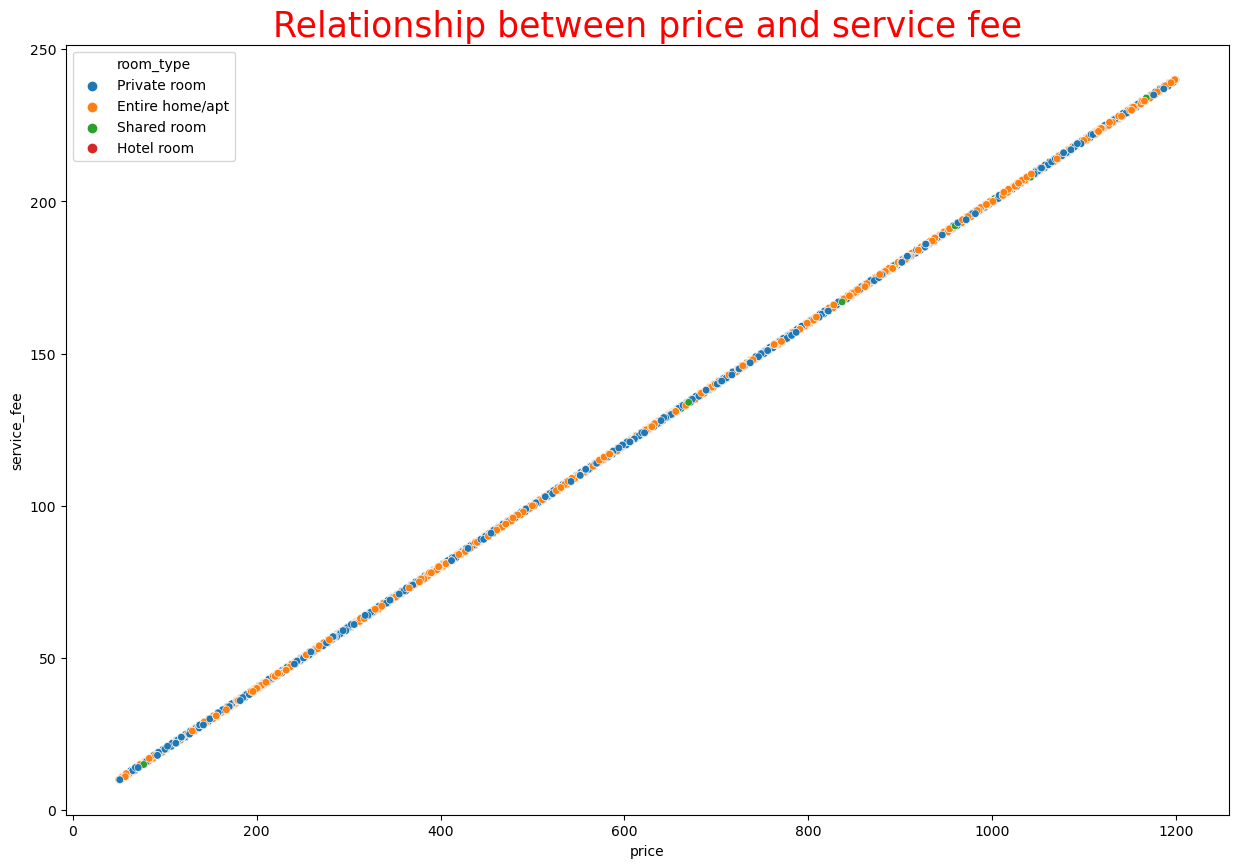

In [178]:
# Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
plt.figure(figsize=(15,10))
plt.title('Relationship between price and service fee',size =25,color='red')
sns.scatterplot(x=df['price'],y=df['service_fee'],hue = df['room_type'],s=30)

In [177]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count', 'days_booked',
       'house_rules', 'license'],
      dtype='object')

In [181]:
#Using a line graph show in which year the maximum construction of rooms took place.
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [186]:
df['construction_year_counts']=df['construction_year'].value_counts()

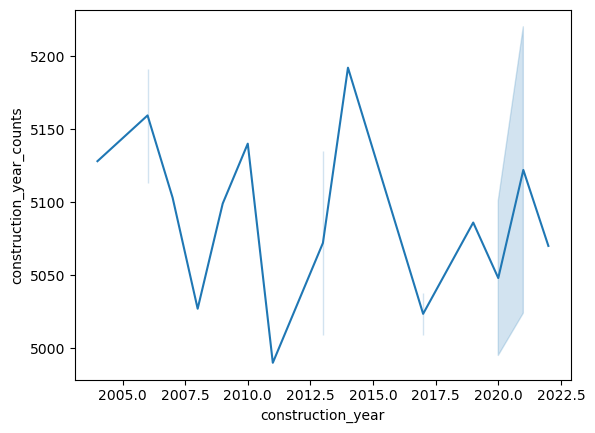

In [188]:
sns.lineplot(x='construction_year',y='construction_year_counts', data=df)
plt.show()

# Task 5c: Data Visualization (Any Tool)
1. With the help of box plots illustrate the following
* Effect of Review Rate number on price
* Effect of host identity verified on price

<Axes: xlabel='review_rate_number', ylabel='price'>

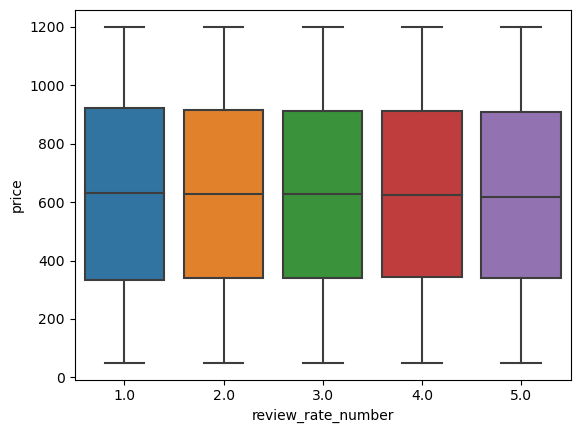

In [189]:
#With the help of box plots illustrate the following
sns.boxplot(x='review_rate_number',y='price', data= df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

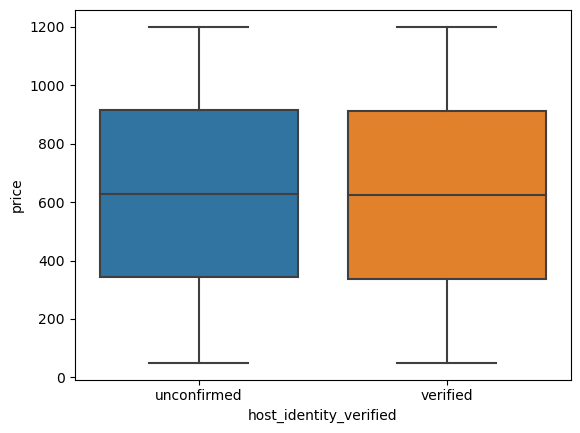

In [190]:
#Effect of host identity verified on price
sns.boxplot(x='host_identity_verified',y='price',data=df)